In [9]:
import cv2
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
import matplotlib.pyplot as plt

In [2]:
def createModel():
        foldername = "./sl/content"
        y = []
        X = []
        H = []
        for root,dirs,_ in os.walk(foldername):
            for d in dirs:
                mypath = os.path.join(root,d)
                for file in os.listdir(mypath):                   
                    image = cv2.imread(os.path.join(mypath,file))
                    #predImage
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
                    # hist = cv2.calcHist([image],[0],None,[256],[0,256])
                    # hist = hist.reshape(-1)
                    # print("hist shape:",hist.shape)
                    image = cv2.resize(image,(160,25))
                    image = image.reshape(-1)
                    X.append(image)
                    y.append(d)
                    # H.append(hist)
#         poly_kernel_svm_clf = Pipeline([
#         ("scaler", StandardScaler()),
#         ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
#         ])
#         poly_kernel_svm_clf.fit(X, y)
        clfsvc = SVC(C=2, probability=True)
        clfsvc.fit(X, y)
        
        return clfsvc

In [3]:
clf = createModel()

In [16]:
test_imgs = os.listdir("./sl/test/yellow/")
for i in test_imgs:
    test_image = cv2.imread("./sl/test/yellow/"+i)
    image = cv2.cvtColor(test_image,cv2.COLOR_BGR2HSV)
    image = image[:int(image.shape[0]/2),:]
    sample = image.copy()
    image = cv2.resize(image,(160,25))
    image = image.reshape(1,-1)
    image.shape
    print(clf.predict(image))

['4']
['4']
['4']
['4']
['2']


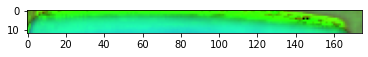

In [17]:
plt.imshow(sample)